Classification report:

               precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.60      0.60      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



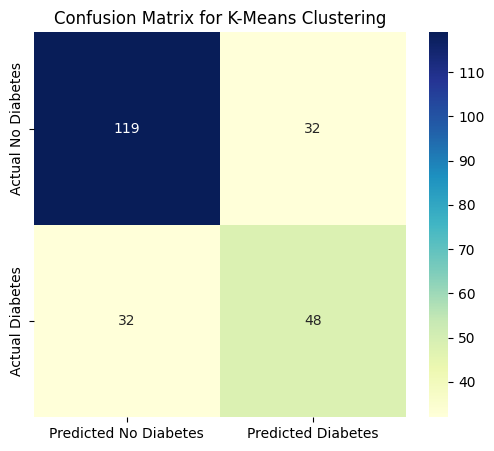

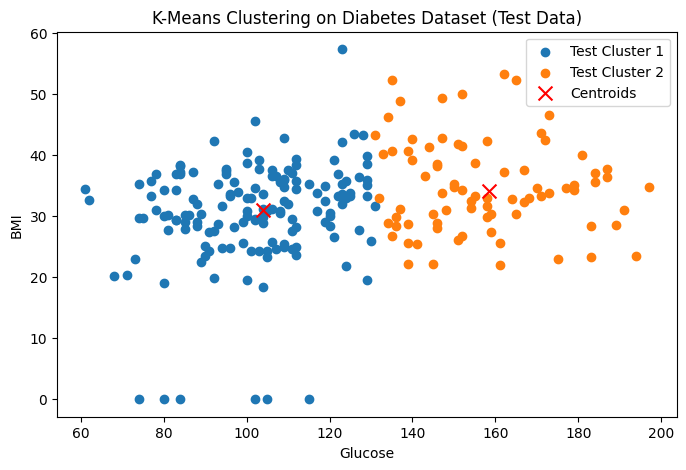

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the Diabetes dataset
data = pd.read_csv("diabetes.csv")
data.head()

# Use 'Glucose' and 'BMI' as features for simplicity
X = data[['Glucose', 'BMI']].values
Y = data['Outcome'].values

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Apply KMeans clustering on the training set
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Predict clusters for the test set
test_clusters = kmeans.predict(X_test)
centroids = kmeans.cluster_centers_

# Adjust cluster labels for better comparison with true labels
# Map clusters to labels manually based on comparison with true labels
# For example, if most of the '1's in Y_test fall in cluster 0, we can map cluster 0 -> 1
# This step might require checking the initial confusion matrix to map correctly
cluster_to_label = {0: 1, 1: 0} if confusion_matrix(Y_test, test_clusters)[0, 0] < confusion_matrix(Y_test, test_clusters)[1, 0] else {0: 0, 1: 1}
test_clusters = np.vectorize(cluster_to_label.get)(test_clusters)

# Print classification report
print('Classification report:\n\n', classification_report(Y_test, test_clusters))

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    confusion_matrix(Y_test, test_clusters),
    annot=True,
    fmt='d',
    cmap="YlGnBu",
    xticklabels=['Predicted No Diabetes', 'Predicted Diabetes'],
    yticklabels=['Actual No Diabetes', 'Actual Diabetes']
)
plt.title("Confusion Matrix for K-Means Clustering")
plt.show()

# Plot the clusters for the test data
plt.figure(figsize=(8, 5))
for i in range(2):
    plt.scatter(X_test[test_clusters == i, 0], X_test[test_clusters == i, 1], label=f'Test Cluster {i + 1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("K-Means Clustering on Diabetes Dataset (Test Data)")
plt.legend()
plt.show()
